In [22]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import imagenet_utils
# preprocess = imagenet_utils.preprocess_input
from keras.applications.vgg16 import preprocess_input
import numpy as np
import scipy.ndimage
from scipy import misc
train_data_dir = '/home/eric/data/ai_challenger_plant_train_20170904/AgriculturalDisease_validationset/data/'


#data_gen=ImageDataGenerator(preprocessing_function=imagenet_utils.preprocess_input)
classes=[]
with open("labels.txt","r") as f:
    for line in f.readlines():
        classes.append(line.strip("\n").split(" ")[0])

img_size = 224
batch_size = 1

def random_crop(img, random_crop_size):
    # Note: image_data_format is 'channel_last'
    assert img.shape[2] == 3
    height, width = img.shape[0], img.shape[1]
    dy, dx = random_crop_size
    x = np.random.randint(0, width - dx + 1)
    y = np.random.randint(0, height - dy + 1)
    return img[y:(y+dy), x:(x+dx), :]

data_gen = ImageDataGenerator(rescale=1.0/255,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.2,
                              zoom_range=0.2,
                             )

def crop_generator(batches, crop_length):
    """Take as input a Keras ImageGen (Iterator) and generate random
    crops from the image batches generated by the original iterator.
    """
    while True:
        batch_x, batch_y = next(batches)
        batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, 3))
        for i in range(batch_x.shape[0]):
            batch_crops[i] = random_crop(batch_x[i], (crop_length, crop_length))
        yield (batch_crops, batch_y)

train_generator = data_gen.flow_from_directory(
        train_data_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical',
        save_to_dir='visualize',
        classes=classes,
        shuffle=True)


Found 4982 images belonging to 61 classes.


In [23]:
CROP_LENGTH=224
train_crops = crop_generator(train_generator, CROP_LENGTH)

In [25]:
Xbatch, Ybatch = next(train_crops)

In [21]:
Ybatch

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [10]:
label_map=(train_generator.class_indices)
label_map

{'0': 0,
 '1': 1,
 '10': 10,
 '11': 11,
 '12': 12,
 '13': 13,
 '14': 14,
 '15': 15,
 '16': 16,
 '17': 17,
 '18': 18,
 '19': 19,
 '2': 2,
 '20': 20,
 '21': 21,
 '22': 22,
 '23': 23,
 '24': 24,
 '25': 25,
 '26': 26,
 '27': 27,
 '28': 28,
 '29': 29,
 '3': 3,
 '30': 30,
 '31': 31,
 '32': 32,
 '33': 33,
 '34': 34,
 '35': 35,
 '36': 36,
 '37': 37,
 '38': 38,
 '39': 39,
 '4': 4,
 '40': 40,
 '41': 41,
 '42': 42,
 '43': 43,
 '44': 44,
 '45': 45,
 '46': 46,
 '47': 47,
 '48': 48,
 '49': 49,
 '5': 5,
 '50': 50,
 '51': 51,
 '52': 52,
 '53': 53,
 '54': 54,
 '55': 55,
 '56': 56,
 '57': 57,
 '58': 58,
 '59': 59,
 '6': 6,
 '60': 60,
 '7': 7,
 '8': 8,
 '9': 9}

In [11]:
Xbatch, Ybatch = train_generator.next()

/home/eric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


TypeError: Cannot cast ufunc multiply output from dtype('float64') to dtype('uint8') with casting rule 'same_kind'

In [4]:
Xbatch[0]

NameError: name 'Xbatch' is not defined

In [44]:
Ybatch[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

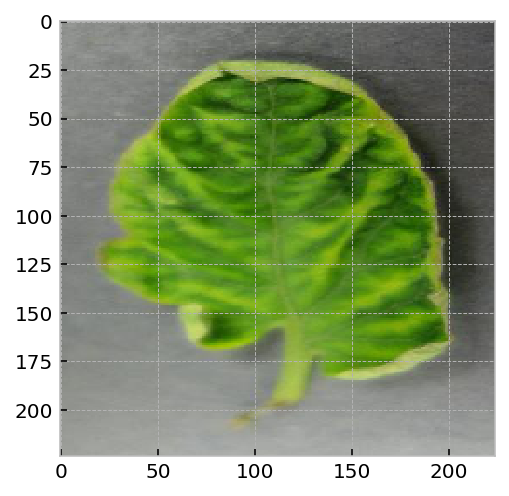

In [15]:
from matplotlib import pyplot as plt
plt.style.use('bmh')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.imshow(Xbatch[0]);